In [13]:
import keras
from keras.models import Sequential 
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten 
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
import pickle
import pandas as pd
import numpy as np
import random

In [12]:
# cloning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [3]:
#list dataset contents
!ls german-traffic-signs/

ls: cannot access 'german-traffic-signs/': No such file or directory


In [9]:
#load the dataset

data = pd.read_csv('german-traffic-signs/signnames.csv')

In [10]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

In [14]:
#loading pickled dataset

with open("german-traffic-signs/train.p",mode='rb') as training:
  train= pickle.load(training)

with open("german-traffic-signs/valid.p",mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)

In [15]:
X_train , y_train = train['features'], train['labels'] 
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'], test['labels']

In [16]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=4


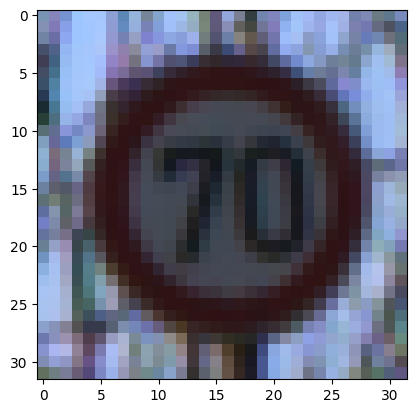

In [17]:
from re import L
index = np.random.randint(L,len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

# New section

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

In [ ]:
def preprocessing(img):
  #convert to grayscale
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Applying histogram equalization
  img=cv2.equalizeHist(img)
  #Normalization
  img=img/255
  return img

In [ ]:
X_train_processed=np.array(list(map(preprocessing,X_train)))
X_validation_processed=np.array(list(map(preprocessing,X_validation)))
X_test_processed=np.array(list(map(preprocessing,X_test)))

In [ ]:
X_train_processed=X_train_processed.reshape((34799, 32, 32, 1))
X_test_processed=X_test_processed.reshape((12630, 32, 32, 1))
X_validation_processed=X_validation_processed.reshape((4410, 32, 32, 1))

In [ ]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(X_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


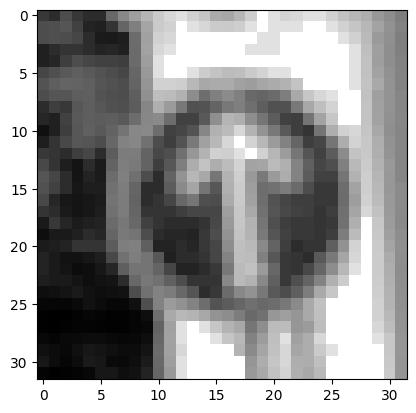

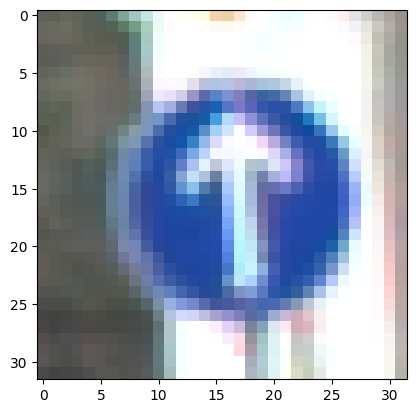

In [ ]:
i=random.randint(L,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

In [ ]:
model=Sequential()
#add the convolutional layer
#filters,size of filters,input_shape,activation_function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.25))

#add another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten the image to 1 dimensional array
model.add(Flatten())

#add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))

#place a dropout layer
#0.5 drop out rate is recommended,half input nodes will be dropped at each update
model.add(Dropout(0.5))

#defining the output layer of out network
model.add(Dense(43,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
#compile our model
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_processed,
                  y_train,
                  batch_size=500,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 68s 975ms/step - loss: 0.1758 - accuracy: 0.9479 - val_loss: 0.2268 - val_accuracy: 0.9313
Epoch 2/50
70/70 [==============================] - 63s 897ms/step - loss: 0.1742 - accuracy: 0.9501 - val_loss: 0.2318 - val_accuracy: 0.9320
Epoch 3/50
70/70 [==============================] - 62s 882ms/step - loss: 0.1661 - accuracy: 0.9518 - val_loss: 0.2276 - val_accuracy: 0.9306
Epoch 4/50
70/70 [==============================] - 61s 860ms/step - loss: 0.1642 - accuracy: 0.9507 - val_loss: 0.2270 - val_accuracy: 0.9317
Epoch 5/50
70/70 [==============================] - 60s 853ms/step - loss: 0.1570 - accuracy: 0.9542 - val_loss: 0.2266 - val_accuracy: 0.9320
Epoch 6/50
70/70 [==============================] - 61s 869ms/step - loss: 0.1555 - accuracy: 0.9549 - val_loss: 0.2219 - val_accuracy: 0.9331
Epoch 7/50
70/70 [==============================] - 60s 858ms/step - loss: 0.1522 - accuracy: 0.9556 - val_loss: 0.2197 - val_accuracy: 0.9345

In [ ]:
score=model.evaluate(X_test_processed,y_test)
print('Test accuracy',score[1])

395/395 [==============================] - 5s 14ms/step - loss: 0.3122 - accuracy: 0.9179
Test accuracy 0.9178938865661621


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

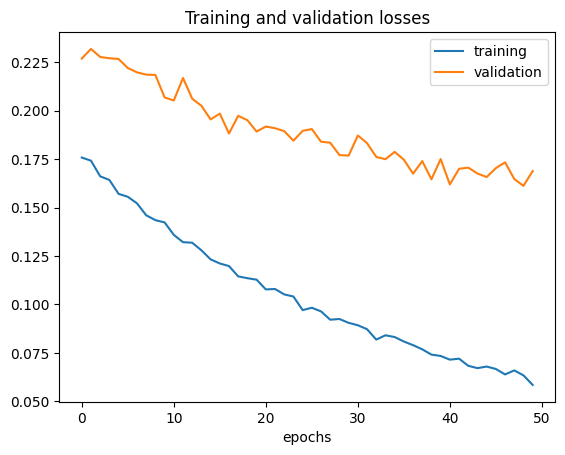

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

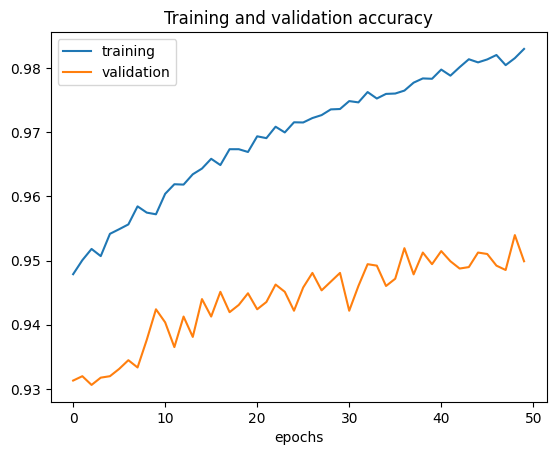

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
prediction =np.argmax(model.predict(X_test_processed),axis=1)
y_true_label=y_test

395/395 [==============================] - 5s 13ms/step


<Axes: >

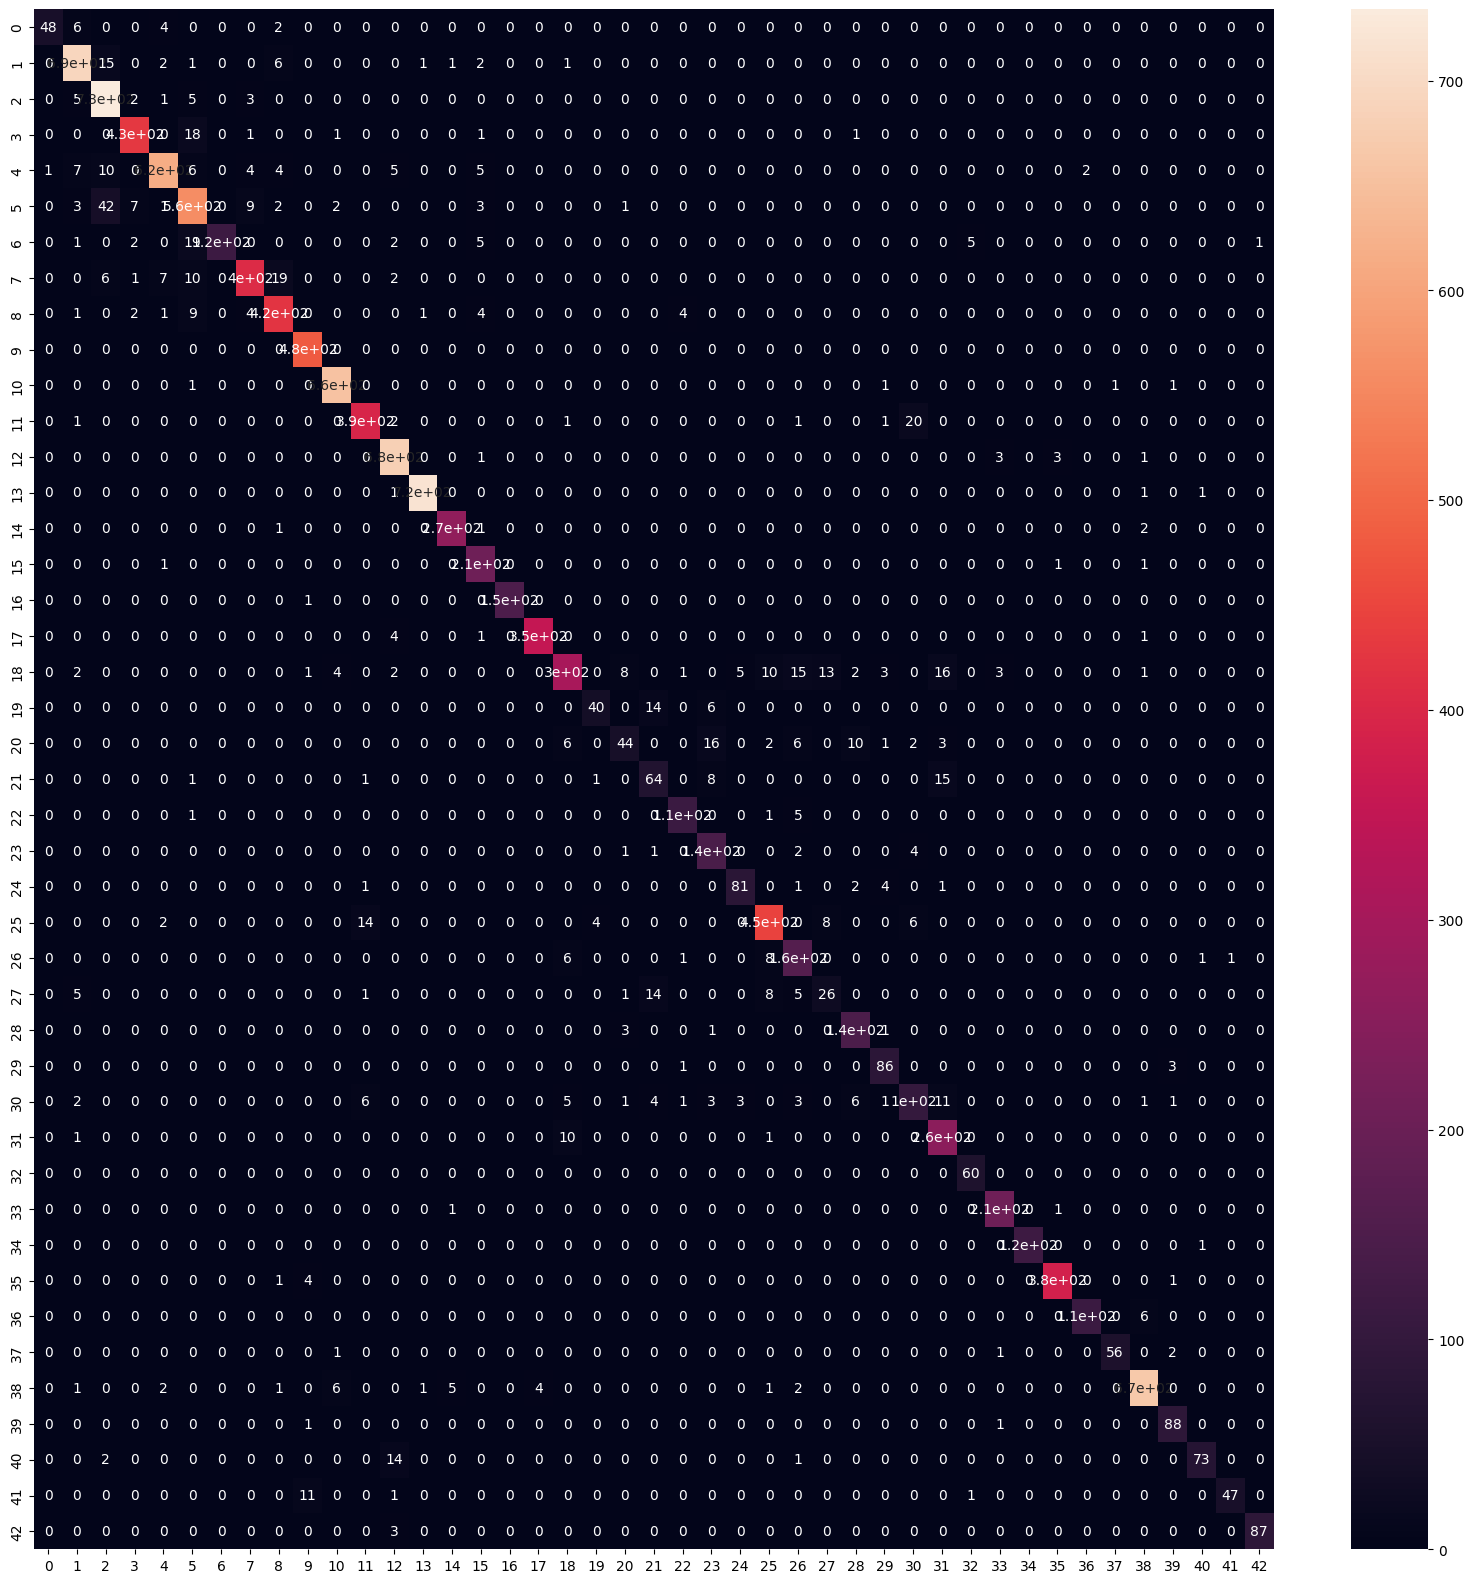

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

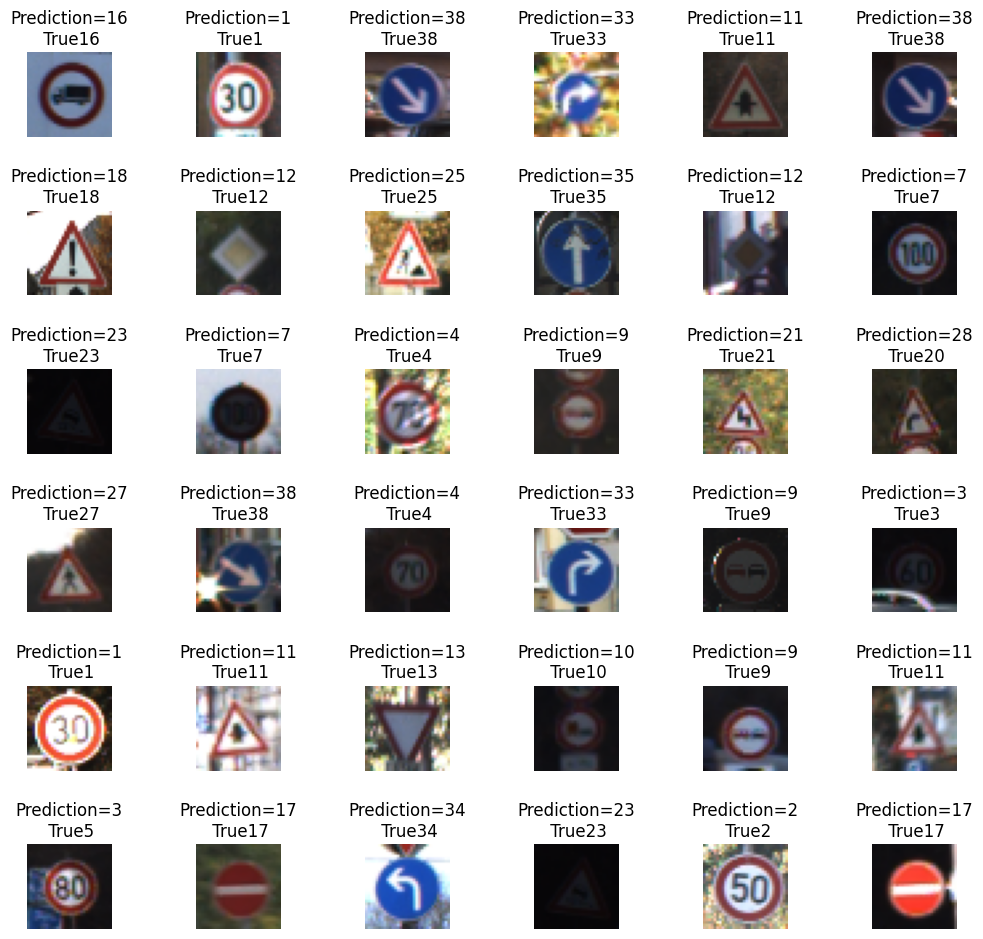

In [ ]:
L=6
W=6
fig, axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction={}\n True{}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)

In [ ]:
model.save('my_model.h5')